In [ ]:
import numpy as np
import pandas as pd
import sklearn as sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Recommendation\ System

/content/gdrive/.shortcut-targets-by-id/1c8x7BbKkKiaVcp1TVIIR9saHeXtD3mGk/Recommendation System


In [ ]:
df = pd.read_csv('lc_2016_2017.csv', low_memory = False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include = numerics)
newdf = newdf.drop('member_id', axis = 1)
newdf = newdf.dropna()
newdf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
143,111730168,4000,4000,4000.0,16.02,140.67,20000.0,33.13,1,1.0,...,30671.0,96.0,1.0,2.0,1271.0,88.0,5700.0,0.0,0.0,2.0
214,112025752,14000,14000,14000.0,20.00,520.30,67000.0,20.35,0,0.0,...,108826.0,85.0,0.0,0.0,4787.0,87.0,10000.0,1.0,1.0,1.0
646,112054293,4000,4000,4000.0,12.62,134.05,42000.0,25.06,1,1.0,...,38772.0,88.0,7.0,9.0,21.0,77.0,6800.0,7.0,3.0,9.0
729,111076596,20000,20000,20000.0,18.06,508.53,22000.0,40.71,0,0.0,...,11621.0,68.0,3.0,7.0,5008.0,65.0,18800.0,0.0,0.0,1.0
1158,111771338,15000,15000,15000.0,10.42,486.98,115000.0,1.17,0,1.0,...,33001.0,154.0,2.0,8.0,1512.0,75.0,25100.0,0.0,2.0,2.0


In [ ]:
len(newdf['int_rate'].unique())

112

In [ ]:
newdf['rounded_int_rate'] = round(newdf['int_rate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
len(newdf['rounded_int_rate'].unique())

27

In [ ]:
newdf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,rounded_int_rate
143,111730168,4000,4000,4000.0,16.02,140.67,20000.0,33.13,1,1.0,...,96.0,1.0,2.0,1271.0,88.0,5700.0,0.0,0.0,2.0,16.0
214,112025752,14000,14000,14000.0,20.00,520.30,67000.0,20.35,0,0.0,...,85.0,0.0,0.0,4787.0,87.0,10000.0,1.0,1.0,1.0,20.0
646,112054293,4000,4000,4000.0,12.62,134.05,42000.0,25.06,1,1.0,...,88.0,7.0,9.0,21.0,77.0,6800.0,7.0,3.0,9.0,13.0
729,111076596,20000,20000,20000.0,18.06,508.53,22000.0,40.71,0,0.0,...,68.0,3.0,7.0,5008.0,65.0,18800.0,0.0,0.0,1.0,18.0
1158,111771338,15000,15000,15000.0,10.42,486.98,115000.0,1.17,0,1.0,...,154.0,2.0,8.0,1512.0,75.0,25100.0,0.0,2.0,2.0,10.0


In [ ]:
len(newdf['id'].unique())

1235

In [ ]:
len(newdf) #for matrix factorization, generate user ids 

1235

With the dataset in the notebook, create a model to **recommend an interest rate associated for application based on the characteristics of the application**. Since client data has discrete rates, for our example data, predict the **rounded_int_rate** variable and treat it as a categorical variable.


* do whatever preprocessing to get the data in format needed for model (use existing code if available)
* train model on training data 
* display metrics for training and test data
* create pipeline where you specify a new input and the output is the recommended interest rate

In [ ]:
from sklearn.preprocessing import StandardScaler
newdf[newdf.columns] = StandardScaler().fit_transform(newdf)
print(newdf.describe())

                 id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  1.235000e+03  1.235000e+03  1.235000e+03     1.235000e+03   
mean  -1.841082e-16 -1.150676e-17 -1.150676e-17    -1.121910e-16   
std    1.000405e+00  1.000405e+00  1.000405e+00     1.000405e+00   
min   -2.140614e+00 -1.904692e+00 -1.904692e+00    -1.904215e+00   
25%   -4.984743e-01 -7.576257e-01 -7.576257e-01    -7.569235e-01   
50%    9.966328e-02 -2.136853e-01 -2.136853e-01    -2.128760e-01   
75%    8.438663e-01  6.881849e-01  6.881849e-01     6.891718e-01   
max    1.392864e+00  2.491925e+00  2.491925e+00     2.493267e+00   

           int_rate   installment    annual_inc           dti   delinq_2yrs  \
count  1.235000e+03  1.235000e+03  1.235000e+03  1.235000e+03  1.235000e+03   
mean  -2.761624e-16  1.841082e-16 -2.473954e-16 -6.904059e-17 -8.630074e-18   
std    1.000405e+00  1.000405e+00  1.000405e+00  1.000405e+00  1.000405e+00   
min   -1.949570e+00 -1.829004e+00 -1.755640e+00 -6.560994e-01 -4.060231

In [ ]:
from sklearn.decomposition import PCA
PCAer = PCA(n_components = 2)
PCAer_result = PCAer.fit_transform(newdf)
print('Explained variation per principal component: {}'.format(PCAer.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(PCAer.explained_variance_ratio_)))

Explained variation per principal component: [0.14211041 0.09038281]
Cumulative variance explained by 2 principal components: 23.25%


In [ ]:
dataset_pca = pd.DataFrame(abs(PCAer.components_), columns=newdf.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)

print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")




             id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
PC_1  0.066779   0.353374     0.353374         0.353372  0.109422   
PC_2  0.185665   0.120523     0.120523         0.120612  0.081061   

      installment  annual_inc       dti  delinq_2yrs  inq_last_6mths  ...  \
PC_1     0.337655    0.159452  0.009626     0.008881        0.022263  ...   
PC_2     0.087324    0.002602  0.010670     0.024622        0.180526  ...   

       il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  \
PC_1  0.006164     0.032456     0.038712    0.133946  0.011676   
PC_2  0.138931     0.127764     0.126031    0.090401  0.119982   

      total_rev_hi_lim    inq_fi  total_cu_tl  inq_last_12m  rounded_int_rate  
PC_1          0.130400  0.022201     0.031660      0.024526          0.108629  
PC_2          0.025624  0.134780     0.051648      0.197582          0.079979  

[2 rows x 50 columns]

*************** Most important features *************************
As per PC 1:
 loan_amnt     

Parameter: {'n_clusters': 2} Score 0.13231240670748212
Parameter: {'n_clusters': 3} Score 0.13003902718843752
Parameter: {'n_clusters': 4} Score 0.09155263096568118
Parameter: {'n_clusters': 5} Score 0.08623183459958923
Parameter: {'n_clusters': 10} Score 0.05647756531370028
Parameter: {'n_clusters': 15} Score 0.05070240564688045
Parameter: {'n_clusters': 20} Score 0.047596391689594356
Parameter: {'n_clusters': 25} Score 0.05254398585445994
Parameter: {'n_clusters': 30} Score 0.053005215937926696
Parameter: {'n_clusters': 35} Score 0.05061077463826367
Parameter: {'n_clusters': 40} Score 0.05253822777171139


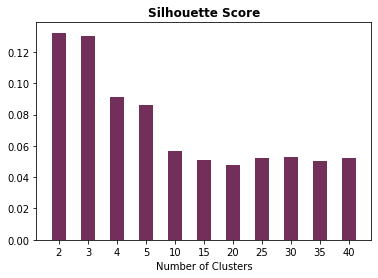

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(newdf)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = silhouette_score(newdf, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722F59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(newdf)
centroids = kmeans.cluster_centers_
centroids_pca = PCAer.transform(centroids)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
def visualizing_results(pca_result, label, centroids_pca):
    """ Visualizing the clusters
    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=label, alpha=0.5, s=200)  # plot different colors per cluster
    plt.title('Wine clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


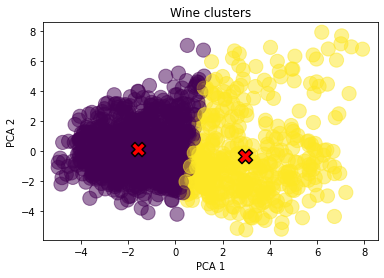

In [ ]:
visualizing_results(PCAer_result, kmeans.labels_, PCAer.transform(centroids))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


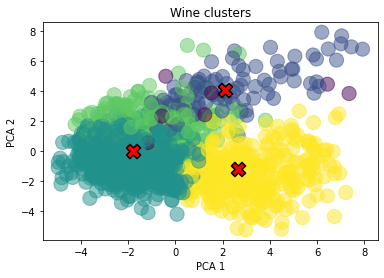

In [ ]:
kmeanserer = KMeans(n_clusters = 3)
kmeanserer.fit(newdf)
centroids = kmeanserer.cluster_centers_
centroids_pca = PCAer.transform(centroids)
visualizing_results(PCAer_result, kmeanser.labels_, PCAer.transform(centroids))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


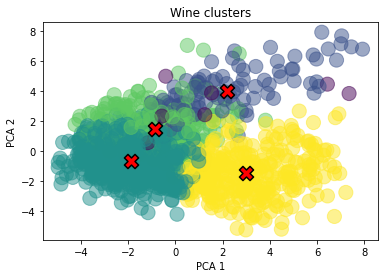

In [ ]:
kmeansererer = KMeans(n_clusters = 4)
kmeansererer.fit(newdf)
centroids = kmeansererer.cluster_centers_
centroids_pca = PCAer.transform(centroids)
visualizing_results(PCAer_result, kmeanser.labels_, PCAer.transform(centroids))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


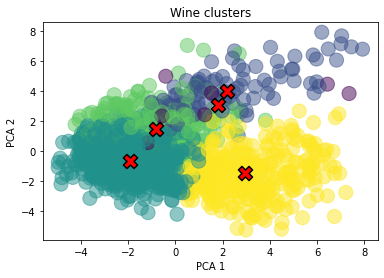

In [ ]:
kmeanser = KMeans(n_clusters = 5)
kmeanser.fit(newdf)
centroids = kmeanser.cluster_centers_
centroids_pca = PCAer.transform(centroids)
visualizing_results(PCAer_result, kmeanser.labels_, PCAer.transform(centroids))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


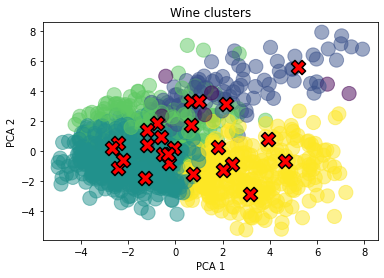

In [ ]:
kmeansererer = KMeans(n_clusters = 25)
kmeansererer.fit(newdf)
centroids = kmeansererer.cluster_centers_
centroids_pca = PCAer.transform(centroids)
visualizing_results(PCAer_result, kmeanser.labels_, PCAer.transform(centroids))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


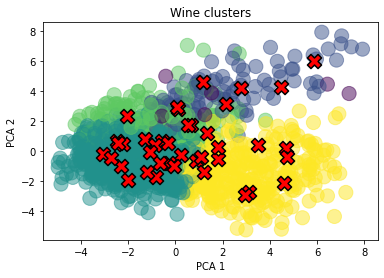

In [ ]:
kmeansererer = KMeans(n_clusters = 40)
kmeansererer.fit(newdf)
centroids = kmeansererer.cluster_centers_
centroids_pca = PCAer.transform(centroids)
visualizing_results(PCAer_result, kmeanser.labels_, PCAer.transform(centroids))